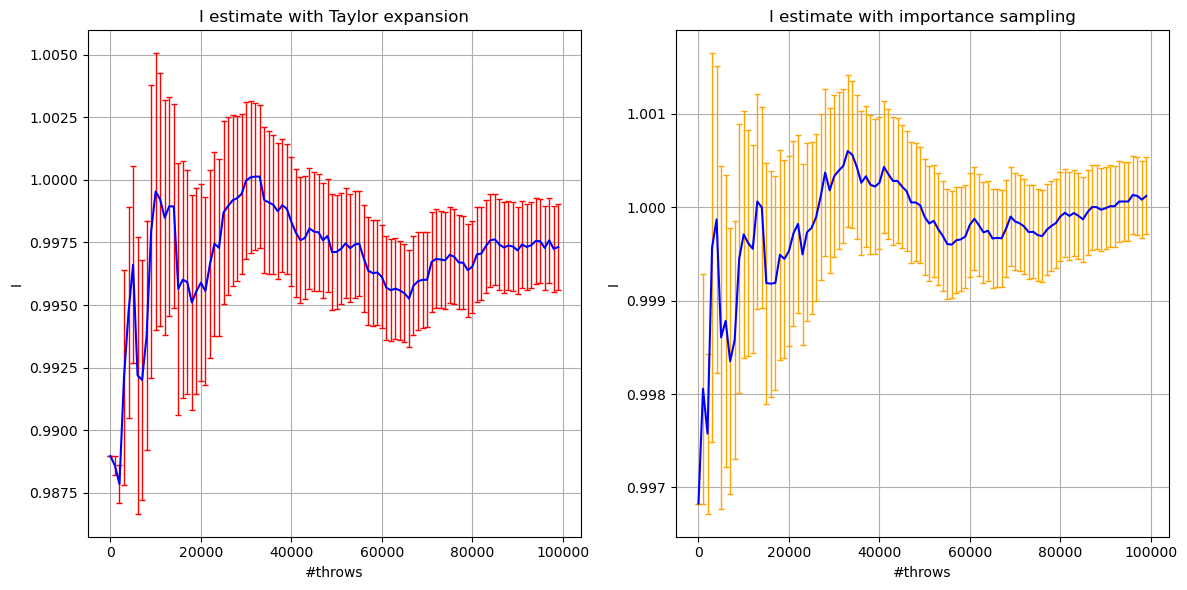

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati
media = np.loadtxt("02.1/data.dat", usecols=0, delimiter=',', unpack='true')
errore = np.loadtxt("02.1/data.dat", usecols=1, delimiter=',', unpack='true')
media1 = np.loadtxt("02.1/data1.dat", usecols=0, delimiter=',', unpack='true')
errore1 = np.loadtxt("02.1/data1.dat", usecols=1, delimiter=',', unpack='true')

# Imposta l'asse x
x = np.arange(100) * 1000

# Crea il layout dei grafici (due in una riga)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico 1: media e errore
axs[0].errorbar(x, media, yerr=errore,color='b', ecolor='r', elinewidth=1, capsize=2)
axs[0].set_xlabel('#throws')
axs[0].set_ylabel('I')
axs[0].set_title('I estimate with Taylor expansion')
axs[0].grid(True)

# Grafico 2: media1 e errore1
axs[1].errorbar(x, media1, yerr=errore1, color='b', ecolor='orange', elinewidth=1, capsize=2)
axs[1].set_xlabel('#throws')
axs[1].set_ylabel('I')
axs[1].set_title('I estimate with importance sampling')
axs[1].grid(True)

# Migliora il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra i grafici
plt.show()



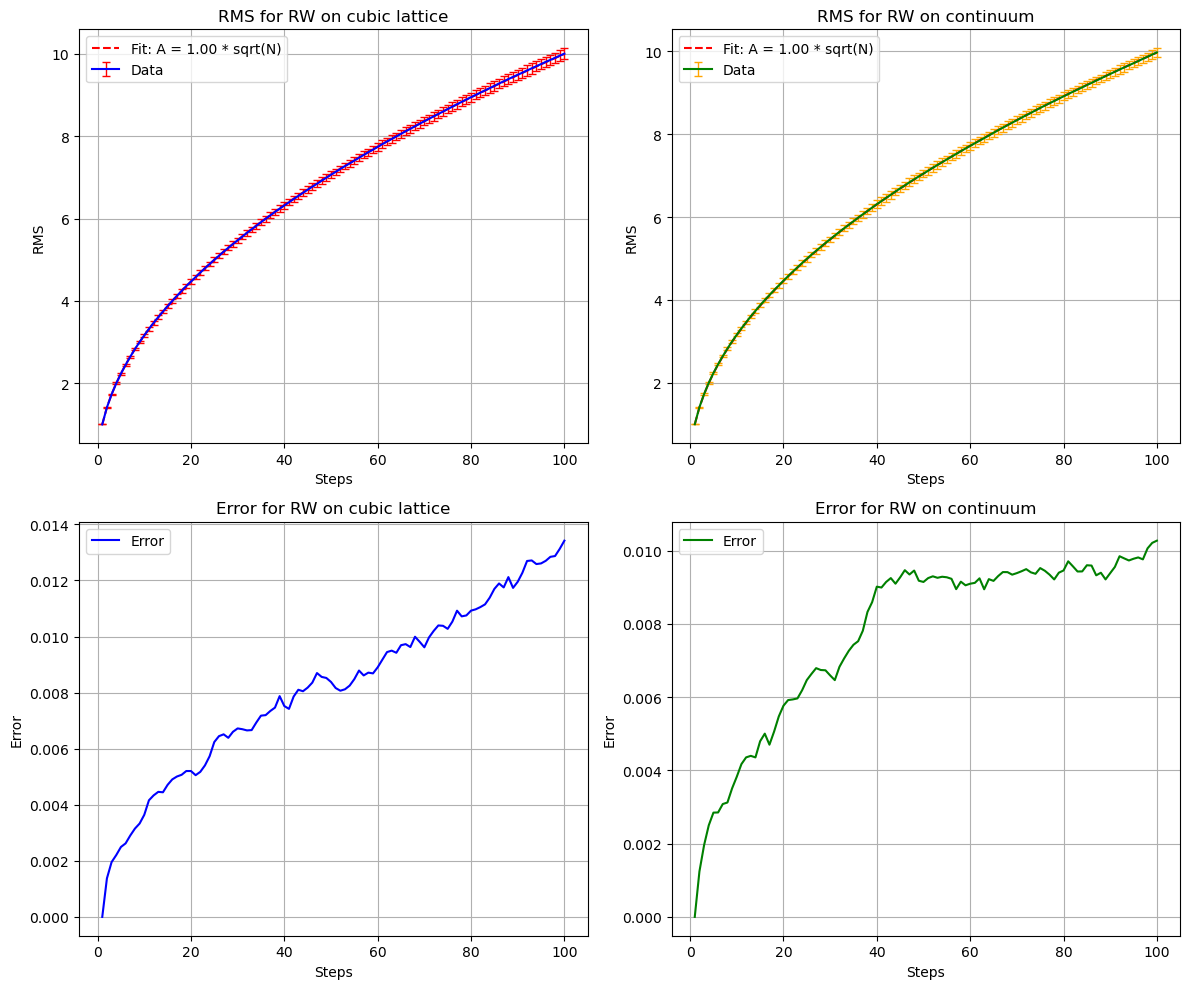

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica i dati
N = 100
x = np.arange(N) + 1
rms, error = np.loadtxt("02.2/data.dat", usecols=(0,1), delimiter=',', unpack='true')
rmscont, errorcont = np.loadtxt("02.2/datacont.dat", usecols=(0,1), delimiter=',', unpack='true')

# Funzione di fitting
def fit_function(N, A):
    return A * np.sqrt(N)

# Calcolo dei parametri di fitting
params, covariance = curve_fit(fit_function, x, rms)
paramscont, covariancecont = curve_fit(fit_function, x, rmscont)

# Parametri del fitting
A_fit = params[0]
Acont_fit = paramscont[0]

# Calcolo delle curve di fitting
rms_fit = fit_function(x, A_fit)
rmscont_fit = fit_function(x, Acont_fit)

# Crea il layout dei grafici (due in una riga)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Grafico 1: RMS per RW su cubic lattice
axs[0, 0].errorbar(x, rms, yerr=error*10, label="Data", color='b', ecolor='r', elinewidth=1, capsize=3)
axs[0, 0].plot(x, rms_fit, label=f"Fit: A = {A_fit:.2f} * sqrt(N)", color='red', linestyle='--')
axs[0, 0].set_title("RMS for RW on cubic lattice")
axs[0, 0].set_xlabel("Steps")
axs[0, 0].set_ylabel("RMS")
axs[0, 0].grid(True)
axs[0, 0].legend()

# Grafico 2: RMS per RW su continuum
axs[0, 1].errorbar(x, rmscont, yerr=errorcont*10, label="Data", color='g', ecolor='orange', elinewidth=1, capsize=3)
axs[0, 1].plot(x, rmscont_fit, label=f"Fit: A = {Acont_fit:.2f} * sqrt(N)", color='red', linestyle='--')
axs[0, 1].set_title('RMS for RW on continuum')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('RMS')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Grafico 3: Errore per RW su cubic lattice
axs[1, 0].plot(x, error, label='Error', color='b')
axs[1, 0].set_title('Error for RW on cubic lattice')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Error')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Grafico 4: Errore per RW su continuum
axs[1, 1].plot(x, errorcont, label='Error', color='g')
axs[1, 1].set_title('Error for RW on continuum')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Error')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Migliora il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra i grafici
plt.show()